Starting Diagnostic Analysis for IAA Issues...
DIAGNOSTIC ANALYSIS: LOADING RAW ANNOTATION DATA
✓ Processing Expert_A: 250 total annotations
  - Total annotations: 250
  - IAA annotations: 71
✓ Processing Expert_K: 250 total annotations
  - Total annotations: 250
  - IAA annotations: 81
✓ Processing Expert_L: 200 total annotations
  - Total annotations: 200
  - IAA annotations: 61
✓ Processing Expert_M: 276 total annotations
  - Total annotations: 276
  - IAA annotations: 84

SCORE DISTRIBUTION ANALYSIS

------------------------------------------------------------
ANALYZING: Image Quality (0-15 scale)
------------------------------------------------------------
  Expert_A:
    All images: 250 scores, range: 0 - 13, mean: 3.52
    IAA images: 71 scores, range: 0 - 13, mean: 3.27
  Expert_K:
    All images: 250 scores, range: 0 - 15, mean: 7.28
    IAA images: 81 scores, range: 0 - 13, mean: 7.40
  Expert_L:
    All images: 200 scores, range: 1 - 13, mean: 6.00
    IAA images: 61 scores,

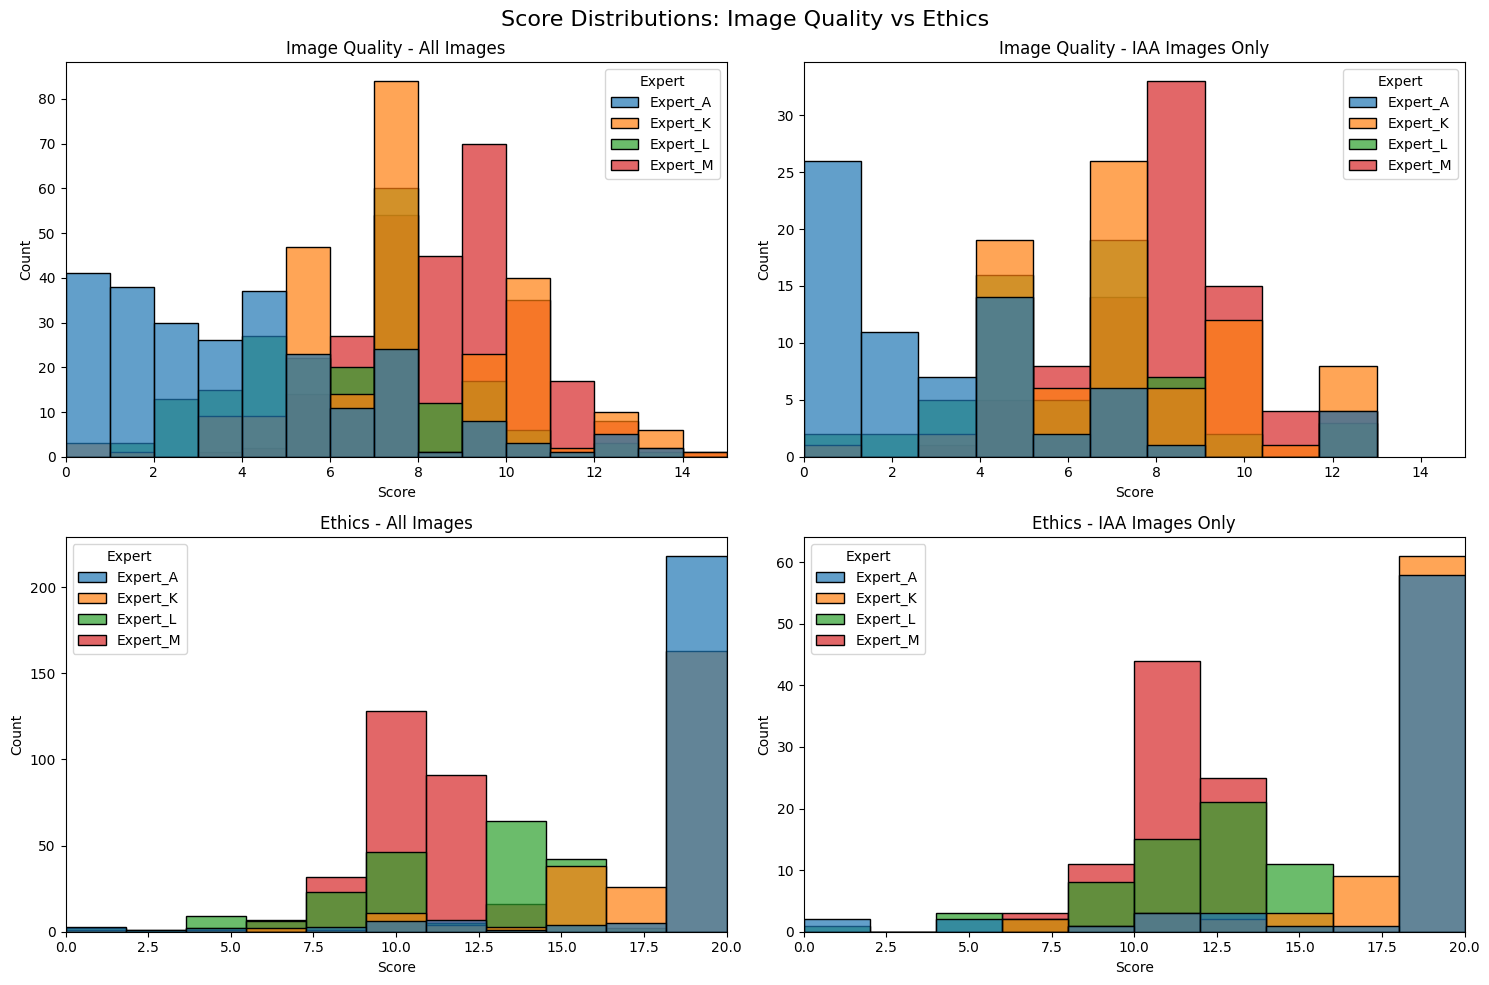


CATEGORY CONVERSION ANALYSIS

------------------------------------------------------------
CATEGORY ANALYSIS: Image Quality
------------------------------------------------------------

Expert_A category distribution:
  Very Low: 44 (62.0%)
  Low: 16 (22.5%)
  Medium: 7 (9.9%)
  High: 2 (2.8%)
  Very High: 2 (2.8%)

Expert_K category distribution:
  Very Low: 3 (3.7%)
  Low: 25 (30.9%)
  Medium: 32 (39.5%)
  High: 19 (23.5%)
  Very High: 2 (2.5%)

Expert_L category distribution:
  Very Low: 9 (14.8%)
  Low: 21 (34.4%)
  Medium: 26 (42.6%)
  High: 4 (6.6%)
  Very High: 1 (1.6%)

Expert_M category distribution:
  Very Low: 1 (1.2%)
  Low: 13 (15.5%)
  Medium: 47 (56.0%)
  High: 21 (25.0%)
  Very High: 2 (2.4%)

CROSS-EXPERT AGREEMENT PATTERNS:
Category usage consistency:
  Very Low: std=24.5% (variable)
  Low: std=7.4% (consistent)
  Medium: std=16.8% (variable)
  High: std=9.9% (consistent)
  Very High: std=0.4% (consistent)

------------------------------------------------------------

In [1]:
"""
Diagnostic Analysis for IAA Issues
=================================

This script investigates potential issues with extremely low Krippendorff's Alpha values
for Image Quality and Ethics dimensions by examining:
1. Raw score distributions
2. Category conversion patterns  
3. Expert agreement patterns
4. Data quality issues

Author: Thesis Analysis - Diagnostic Module
Date: June 2025
"""

import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION (same as your main script)
# ============================================================================

ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"

ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

SCALED_DIMENSIONS = {
    'img_simplicity': {'scale_max': 15, 'display_name': 'Image Simplicity'},
    'img_quality': {'scale_max': 15, 'display_name': 'Image Quality'},
    'txt_simplicity': {'scale_max': 15, 'display_name': 'Text Simplicity'},
    'txt_quality': {'scale_max': 15, 'display_name': 'Text Quality'},
    'ethics': {'scale_max': 20, 'display_name': 'Ethics'},
    'txt_img_align': {'scale_max': 20, 'display_name': 'Text-Image Alignment'}
}

def convert_score_to_category(score, scale_max):
    """Same conversion function as main script"""
    if score is None or pd.isna(score):
        return None
    
    if scale_max == 15:
        if 0 <= score <= 3:
            return 0  # Very Low
        elif 4 <= score <= 6:
            return 1  # Low
        elif 7 <= score <= 9:
            return 2  # Medium
        elif 10 <= score <= 12:
            return 3  # High
        elif 13 <= score <= 15:
            return 4  # Very High
    
    elif scale_max == 20:
        if 0 <= score <= 4:
            return 0  # Very Low
        elif 5 <= score <= 8:
            return 1  # Low
        elif 9 <= score <= 12:
            return 2  # Medium
        elif 13 <= score <= 16:
            return 3  # High
        elif 17 <= score <= 20:
            return 4  # Very High
    
    return None

# ============================================================================
# DATA LOADING AND EXTRACTION
# ============================================================================

def load_and_extract_raw_scores():
    """
    Load raw annotation data and extract all scores for analysis.
    
    Returns:
        dict: Raw scores organized by expert and dimension
    """
    print("=" * 80)
    print("DIAGNOSTIC ANALYSIS: LOADING RAW ANNOTATION DATA")
    print("=" * 80)
    
    expert_raw_scores = {}
    expert_iaa_scores = {}
    
    for expert, filename in ANNOTATION_FILES.items():
        file_path = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            print(f"✓ Processing {expert}: {len(data)} total annotations")
            
            # Extract scores for all images and IAA images separately
            all_scores = {dim: [] for dim in SCALED_DIMENSIONS.keys()}
            iaa_scores = {dim: [] for dim in SCALED_DIMENSIONS.keys()}
            
            iaa_count = 0
            total_count = 0
            
            for record in data:
                filename = record['data']['original_filename']
                is_iaa = '_IAA' in filename
                
                if record['annotations'] and len(record['annotations']) > 0:
                    annotation = record['annotations'][0]['result']
                    
                    # Extract scores for each dimension
                    for item in annotation:
                        if item.get('type') == 'number':
                            from_name = item.get('from_name')
                            value = item.get('value', {}).get('number')
                            
                            if from_name in SCALED_DIMENSIONS and value is not None:
                                all_scores[from_name].append(value)
                                if is_iaa:
                                    iaa_scores[from_name].append(value)
                    
                    total_count += 1
                    if is_iaa:
                        iaa_count += 1
            
            expert_raw_scores[expert] = all_scores
            expert_iaa_scores[expert] = iaa_scores
            
            print(f"  - Total annotations: {total_count}")
            print(f"  - IAA annotations: {iaa_count}")
            
        except Exception as e:
            print(f"✗ Error loading {expert}: {e}")
            continue
    
    return expert_raw_scores, expert_iaa_scores

# ============================================================================
# DISTRIBUTION ANALYSIS
# ============================================================================

def analyze_score_distributions(expert_raw_scores, expert_iaa_scores, focus_dims=['img_quality', 'ethics']):
    """
    Analyze and visualize score distributions for problematic dimensions.
    
    Args:
        expert_raw_scores (dict): Raw scores for all images
        expert_iaa_scores (dict): Raw scores for IAA images only
        focus_dims (list): Dimensions to focus on
    """
    print(f"\n{'=' * 80}")
    print("SCORE DISTRIBUTION ANALYSIS")
    print(f"{'=' * 80}")
    
    # Create subplots for distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Score Distributions: Image Quality vs Ethics', fontsize=16)
    
    for i, dimension in enumerate(focus_dims):
        display_name = SCALED_DIMENSIONS[dimension]['display_name']
        scale_max = SCALED_DIMENSIONS[dimension]['scale_max']
        
        print(f"\n{'-' * 60}")
        print(f"ANALYZING: {display_name} (0-{scale_max} scale)")
        print(f"{'-' * 60}")
        
        # Collect all scores for this dimension
        all_expert_scores = []
        iaa_expert_scores = []
        expert_labels = []
        expert_iaa_labels = []
        
        for expert in expert_raw_scores.keys():
            if dimension in expert_raw_scores[expert]:
                all_scores = expert_raw_scores[expert][dimension]
                iaa_scores = expert_iaa_scores[expert][dimension]
                
                all_expert_scores.extend(all_scores)
                iaa_expert_scores.extend(iaa_scores)
                expert_labels.extend([expert] * len(all_scores))
                expert_iaa_labels.extend([expert] * len(iaa_scores))
                
                print(f"  {expert}:")
                print(f"    All images: {len(all_scores)} scores, "
                      f"range: {min(all_scores) if all_scores else 'N/A'} - {max(all_scores) if all_scores else 'N/A'}, "
                      f"mean: {np.mean(all_scores):.2f}" if all_scores else "N/A")
                print(f"    IAA images: {len(iaa_scores)} scores, "
                      f"range: {min(iaa_scores) if iaa_scores else 'N/A'} - {max(iaa_scores) if iaa_scores else 'N/A'}, "
                      f"mean: {np.mean(iaa_scores):.2f}" if iaa_scores else "N/A")
        
        # Plot distributions
        # All images
        ax1 = axes[i, 0]
        if all_expert_scores:
            df_all = pd.DataFrame({'Score': all_expert_scores, 'Expert': expert_labels})
            sns.histplot(data=df_all, x='Score', hue='Expert', alpha=0.7, ax=ax1)
            ax1.set_title(f'{display_name} - All Images')
            ax1.set_xlim(0, scale_max)
        
        # IAA images only
        ax2 = axes[i, 1]
        if iaa_expert_scores:
            df_iaa = pd.DataFrame({'Score': iaa_expert_scores, 'Expert': expert_iaa_labels})
            sns.histplot(data=df_iaa, x='Score', hue='Expert', alpha=0.7, ax=ax2)
            ax2.set_title(f'{display_name} - IAA Images Only')
            ax2.set_xlim(0, scale_max)
        
        # Statistical summary
        if all_expert_scores:
            print(f"\n  OVERALL STATISTICS:")
            print(f"    All images: n={len(all_expert_scores)}, mean={np.mean(all_expert_scores):.2f}, std={np.std(all_expert_scores):.2f}")
            print(f"    IAA images: n={len(iaa_expert_scores)}, mean={np.mean(iaa_expert_scores):.2f}, std={np.std(iaa_expert_scores):.2f}")
            
            # Check for potential issues
            unique_scores = len(set(all_expert_scores))
            print(f"    Unique values: {unique_scores} out of {scale_max + 1} possible")
            
            if unique_scores <= 3:
                print(f"    ⚠️ WARNING: Very limited score variety may cause low agreement!")
            
            # Check for clustering
            score_counts = Counter(all_expert_scores)
            most_common = score_counts.most_common(3)
            print(f"    Most common scores: {most_common}")
            
            # Check if most scores are at extremes
            extreme_scores = sum(1 for s in all_expert_scores if s <= 2 or s >= scale_max - 2)
            extreme_pct = (extreme_scores / len(all_expert_scores)) * 100
            print(f"    Extreme scores (≤2 or ≥{scale_max-2}): {extreme_pct:.1f}%")
            
            if extreme_pct > 80:
                print(f"    ⚠️ WARNING: High concentration at extremes may cause agreement issues!")
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# CATEGORY CONVERSION ANALYSIS
# ============================================================================

def analyze_category_conversion(expert_iaa_scores, focus_dims=['img_quality', 'ethics']):
    """
    Analyze how raw scores convert to ordinal categories and expert agreement patterns.
    
    Args:
        expert_iaa_scores (dict): IAA scores by expert
        focus_dims (list): Dimensions to analyze
    """
    print(f"\n{'=' * 80}")
    print("CATEGORY CONVERSION ANALYSIS")
    print(f"{'=' * 80}")
    
    category_names = {0: "Very Low", 1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
    
    for dimension in focus_dims:
        display_name = SCALED_DIMENSIONS[dimension]['display_name']
        scale_max = SCALED_DIMENSIONS[dimension]['scale_max']
        
        print(f"\n{'-' * 60}")
        print(f"CATEGORY ANALYSIS: {display_name}")
        print(f"{'-' * 60}")
        
        # Analyze category distributions by expert
        expert_categories = {}
        
        for expert in expert_iaa_scores.keys():
            if dimension in expert_iaa_scores[expert]:
                scores = expert_iaa_scores[expert][dimension]
                categories = [convert_score_to_category(s, scale_max) for s in scores]
                categories = [c for c in categories if c is not None]
                expert_categories[expert] = categories
                
                # Category distribution
                cat_counts = Counter(categories)
                print(f"\n{expert} category distribution:")
                for cat in range(5):
                    count = cat_counts.get(cat, 0)
                    pct = (count / len(categories)) * 100 if categories else 0
                    print(f"  {category_names[cat]}: {count} ({pct:.1f}%)")
        
        # Cross-expert agreement analysis
        print(f"\nCROSS-EXPERT AGREEMENT PATTERNS:")
        
        # Find common images across experts (for agreement calculation)
        common_images = set()
        # This is simplified - you'd need to track which specific images each expert rated
        
        print(f"Category usage consistency:")
        for cat in range(5):
            expert_usage = []
            for expert, categories in expert_categories.items():
                usage_pct = (categories.count(cat) / len(categories)) * 100 if categories else 0
                expert_usage.append(usage_pct)
            
            if expert_usage:
                std_usage = np.std(expert_usage)
                print(f"  {category_names[cat]}: std={std_usage:.1f}% {'(consistent)' if std_usage < 10 else '(variable)'}")

# ============================================================================
# DETAILED IAA IMAGE ANALYSIS
# ============================================================================

def analyze_specific_iaa_images(focus_dims=['img_quality', 'ethics']):
    """
    Analyze specific IAA images to understand disagreement patterns.
    
    Args:
        focus_dims (list): Dimensions to analyze in detail
    """
    print(f"\n{'=' * 80}")
    print("DETAILED IAA IMAGE ANALYSIS")
    print(f"{'=' * 80}")
    
    # Load all annotation data with image tracking
    expert_annotations = {}
    
    for expert, filename in ANNOTATION_FILES.items():
        file_path = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            annotations_dict = {}
            
            for record in data:
                filename = record['data']['original_filename']
                
                if '_IAA' in filename:
                    if record['annotations'] and len(record['annotations']) > 0:
                        annotation = record['annotations'][0]['result']
                        scores = {}
                        
                        for item in annotation:
                            if item.get('type') == 'number':
                                from_name = item.get('from_name')
                                value = item.get('value', {}).get('number')
                                
                                if from_name in SCALED_DIMENSIONS and value is not None:
                                    scores[from_name] = value
                        
                        annotations_dict[filename] = scores
            
            expert_annotations[expert] = annotations_dict
            
        except Exception as e:
            print(f"Error loading {expert}: {e}")
            continue
    
    # Find images annotated by multiple experts
    image_expert_count = defaultdict(list)
    for expert, annotations in expert_annotations.items():
        for image in annotations.keys():
            image_expert_count[image].append(expert)
    
    # Analyze high-disagreement cases
    for dimension in focus_dims:
        display_name = SCALED_DIMENSIONS[dimension]['display_name']
        scale_max = SCALED_DIMENSIONS[dimension]['scale_max']
        
        print(f"\n{'-' * 40}")
        print(f"DISAGREEMENT ANALYSIS: {display_name}")
        print(f"{'-' * 40}")
        
        disagreement_cases = []
        
        for image, experts_list in image_expert_count.items():
            if len(experts_list) >= 2:  # At least 2 experts
                scores = []
                expert_scores = {}
                
                for expert in experts_list:
                    if (expert in expert_annotations and 
                        image in expert_annotations[expert] and 
                        dimension in expert_annotations[expert][image]):
                        
                        score = expert_annotations[expert][image][dimension]
                        scores.append(score)
                        expert_scores[expert] = score
                
                if len(scores) >= 2:
                    score_range = max(scores) - min(scores)
                    disagreement_cases.append({
                        'image': image,
                        'experts': experts_list,
                        'scores': expert_scores,
                        'range': score_range,
                        'std': np.std(scores)
                    })
        
        # Sort by disagreement level
        disagreement_cases.sort(key=lambda x: x['std'], reverse=True)
        
        print(f"Top 10 highest disagreement cases:")
        for i, case in enumerate(disagreement_cases[:10]):
            print(f"\n{i+1}. {case['image']}")
            print(f"   Experts: {len(case['experts'])}")
            for expert, score in case['scores'].items():
                category = convert_score_to_category(score, scale_max)
                cat_name = {0: "VLow", 1: "Low", 2: "Med", 3: "High", 4: "VHigh"}.get(category, "?")
                print(f"   {expert}: {score} ({cat_name})")
            print(f"   Range: {case['range']}, Std: {case['std']:.2f}")

# ============================================================================
# MAIN DIAGNOSTIC FUNCTION
# ============================================================================

def run_diagnostic_analysis():
    """
    Run complete diagnostic analysis for IAA issues.
    """
    print("Starting Diagnostic Analysis for IAA Issues...")
    
    # Load raw data
    expert_raw_scores, expert_iaa_scores = load_and_extract_raw_scores()
    
    # Analyze distributions
    analyze_score_distributions(expert_raw_scores, expert_iaa_scores)
    
    # Analyze category conversions
    analyze_category_conversion(expert_iaa_scores)
    
    # Analyze specific disagreement cases
    analyze_specific_iaa_images()
    
    print(f"\n{'=' * 80}")
    print("DIAGNOSTIC ANALYSIS COMPLETE!")
    print(f"{'=' * 80}")
    print("\nKey things to check:")
    print("1. Are score distributions too narrow or clustered?")
    print("2. Are experts using different parts of the scale?")
    print("3. Are there systematic biases in scoring patterns?")
    print("4. Is the category binning appropriate for your data?")

if __name__ == "__main__":
    run_diagnostic_analysis()

In [3]:
"""
Extract Specific Image Ratings
==============================

This script extracts the exact numerical ratings for specific images
from all experts across all dimensions.

Author: Thesis Analysis - Image Rating Extractor
Date: June 2025
"""

import json
import os
import pandas as pd
import numpy as np
from collections import defaultdict

# ============================================================================
# CONFIGURATION
# ============================================================================

ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"

ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

SCALED_DIMENSIONS = {
    'img_simplicity': {'scale_max': 15, 'display_name': 'Image Simplicity'},
    'img_quality': {'scale_max': 15, 'display_name': 'Image Quality'},
    'txt_simplicity': {'scale_max': 15, 'display_name': 'Text Simplicity'},
    'txt_quality': {'scale_max': 15, 'display_name': 'Text Quality'},
    'ethics': {'scale_max': 20, 'display_name': 'Ethics'},
    'txt_img_align': {'scale_max': 20, 'display_name': 'Text-Image Alignment'}
}

def convert_score_to_category(score, scale_max):
    """Convert numerical score to category name"""
    if score is None or pd.isna(score):
        return None
    
    if scale_max == 15:
        if 0 <= score <= 3:
            return "Very Low"
        elif 4 <= score <= 6:
            return "Low"
        elif 7 <= score <= 9:
            return "Medium"
        elif 10 <= score <= 12:
            return "High"
        elif 13 <= score <= 15:
            return "Very High"
    
    elif scale_max == 20:
        if 0 <= score <= 4:
            return "Very Low"
        elif 5 <= score <= 8:
            return "Low"
        elif 9 <= score <= 12:
            return "Medium"
        elif 13 <= score <= 16:
            return "High"
        elif 17 <= score <= 20:
            return "Very High"
    
    return None

# ============================================================================
# DATA EXTRACTION FUNCTIONS
# ============================================================================

def load_all_annotations():
    """
    Load all annotations with image filename tracking.
    
    Returns:
        dict: expert -> image -> dimension -> score mapping
    """
    expert_annotations = {}
    
    for expert, filename in ANNOTATION_FILES.items():
        file_path = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            annotations_dict = {}
            
            for record in data:
                image_filename = record['data']['original_filename']
                
                if record['annotations'] and len(record['annotations']) > 0:
                    annotation = record['annotations'][0]['result']
                    scores = {}
                    
                    for item in annotation:
                        if item.get('type') == 'number':
                            from_name = item.get('from_name')
                            value = item.get('value', {}).get('number')
                            
                            if from_name in SCALED_DIMENSIONS and value is not None:
                                scores[from_name] = value
                    
                    if scores:  # Only store if we have scores
                        annotations_dict[image_filename] = scores
            
            expert_annotations[expert] = annotations_dict
            print(f"✓ Loaded {expert}: {len(annotations_dict)} annotated images")
            
        except Exception as e:
            print(f"✗ Error loading {expert}: {e}")
            continue
    
    return expert_annotations

def get_image_ratings(expert_annotations, image_filename):
    """
    Get complete rating profile for a specific image.
    
    Args:
        expert_annotations (dict): All annotation data
        image_filename (str): Specific image to analyze
    
    Returns:
        dict: Complete rating breakdown
    """
    print(f"\n{'=' * 80}")
    print(f"COMPLETE RATING PROFILE: {image_filename}")
    print(f"{'=' * 80}")
    
    # Check which experts rated this image
    experts_who_rated = []
    for expert, annotations in expert_annotations.items():
        if image_filename in annotations:
            experts_who_rated.append(expert)
    
    if not experts_who_rated:
        print(f"❌ No experts found who rated {image_filename}")
        return None
    
    print(f"Experts who rated this image: {experts_who_rated}")
    
    # Create comprehensive rating table
    results = {}
    
    for dimension, dim_info in SCALED_DIMENSIONS.items():
        display_name = dim_info['display_name']
        scale_max = dim_info['scale_max']
        
        print(f"\n{'-' * 60}")
        print(f"{display_name} (0-{scale_max} scale)")
        print(f"{'-' * 60}")
        
        dimension_ratings = {}
        scores = []
        categories = []
        
        for expert in ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']:
            if (expert in expert_annotations and 
                image_filename in expert_annotations[expert] and 
                dimension in expert_annotations[expert][image_filename]):
                
                score = expert_annotations[expert][image_filename][dimension]
                category = convert_score_to_category(score, scale_max)
                
                dimension_ratings[expert] = {
                    'score': score,
                    'category': category
                }
                scores.append(score)
                categories.append(category)
                
                print(f"  {expert}: {score} ({category})")
            else:
                dimension_ratings[expert] = {
                    'score': None,
                    'category': 'Not Rated'
                }
                print(f"  {expert}: Not Rated")
        
        # Calculate statistics if we have scores
        if scores:
            score_range = max(scores) - min(scores)
            score_std = np.std(scores)
            unique_categories = len(set(categories))
            
            print(f"\n  📊 Statistics:")
            print(f"    Range: {min(scores)} - {max(scores)} (spread: {score_range})")
            print(f"    Mean: {np.mean(scores):.2f}, Std: {score_std:.2f}")
            print(f"    Category spread: {unique_categories} different categories")
            print(f"    Categories: {list(set(categories))}")
            
            if score_range >= scale_max * 0.5:
                print(f"    ⚠️ HIGH DISAGREEMENT: Range covers {score_range/scale_max*100:.1f}% of scale!")
        
        results[dimension] = dimension_ratings
    
    return results

def get_multiple_image_ratings(expert_annotations, image_list):
    """
    Get ratings for multiple images in a summary table.
    
    Args:
        expert_annotations (dict): All annotation data
        image_list (list): List of image filenames to analyze
    
    Returns:
        pd.DataFrame: Summary table of all ratings
    """
    all_data = []
    
    for image_filename in image_list:
        image_results = get_image_ratings(expert_annotations, image_filename)
        
        if image_results:
            for dimension, ratings in image_results.items():
                display_name = SCALED_DIMENSIONS[dimension]['display_name']
                
                row = {
                    'Image': image_filename,
                    'Dimension': display_name,
                }
                
                # Add expert scores
                for expert in ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']:
                    score = ratings[expert]['score']
                    category = ratings[expert]['category']
                    row[f'{expert}_Score'] = score
                    row[f'{expert}_Category'] = category
                
                # Add statistics
                scores = [ratings[expert]['score'] for expert in ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M'] 
                         if ratings[expert]['score'] is not None]
                
                if scores:
                    row['Range'] = max(scores) - min(scores)
                    row['Mean'] = np.mean(scores)
                    row['Std'] = np.std(scores)
                    row['N_Experts'] = len(scores)
                else:
                    row['Range'] = None
                    row['Mean'] = None
                    row['Std'] = None
                    row['N_Experts'] = 0
                
                all_data.append(row)
    
    return pd.DataFrame(all_data)

# ============================================================================
# MAIN FUNCTIONS
# ============================================================================

def analyze_specific_images():
    """
    Analyze specific high-disagreement images identified in your analysis.
    """
    print("Loading all annotation data...")
    expert_annotations = load_all_annotations()
    
    # High-disagreement images from your analysis
    problem_images = [
        '0125_IAA.png',  # Appeared in both Image Quality and Ethics
        '0641_IAA.png',  # Maximum disagreement in Image Quality
        '0101_IAA.png',  # High disagreement in multiple dimensions
        '0743_IAA.png',  # High disagreement in Text Quality
        '1942_IAA.png',  # High disagreement in Ethics
    ]
    
    print(f"\n{'=' * 100}")
    print("ANALYZING HIGH-DISAGREEMENT IMAGES")
    print(f"{'=' * 100}")
    
    # Analyze each image individually
    for image in problem_images:
        get_image_ratings(expert_annotations, image)
    
    # Create summary table
    print(f"\n{'=' * 100}")
    print("SUMMARY TABLE FOR ALL PROBLEM IMAGES")
    print(f"{'=' * 100}")
    
    summary_df = get_multiple_image_ratings(expert_annotations, problem_images)
    
    # Display the most important columns
    key_columns = ['Image', 'Dimension', 'Expert_A_Score', 'Expert_K_Score', 
                   'Expert_L_Score', 'Expert_M_Score', 'Range', 'Std']
    
    if not summary_df.empty:
        print("\nSUMMARY TABLE:")
        print(summary_df[key_columns].to_string(index=False))
        
        # Save to CSV for easy viewing
        summary_df.to_csv('problem_images_detailed_ratings.csv', index=False)
        print(f"\n📁 Detailed results saved to 'problem_images_detailed_ratings.csv'")
    
    return expert_annotations, summary_df

def analyze_single_image(image_filename):
    """
    Quick function to analyze just one specific image.
    
    Args:
        image_filename (str): The image to analyze
    """
    print("Loading annotation data...")
    expert_annotations = load_all_annotations()
    
    return get_image_ratings(expert_annotations, image_filename)

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Analyze the specific problem images
    expert_annotations, summary_df = analyze_specific_images()
    
    # You can also analyze a single image like this:
    single_result = analyze_single_image('0125_IAA.png')
    
    print(f"\n{'=' * 80}")
    print("ANALYSIS COMPLETE!")
    print(f"{'=' * 80}")
    print("Use the functions:")
    print("- analyze_single_image('filename.png') for one image")
    print("- get_image_ratings(expert_annotations, 'filename.png') for detailed breakdown")

Loading all annotation data...
✓ Loaded Expert_A: 250 annotated images
✓ Loaded Expert_K: 250 annotated images
✓ Loaded Expert_L: 200 annotated images
✓ Loaded Expert_M: 276 annotated images

ANALYZING HIGH-DISAGREEMENT IMAGES

COMPLETE RATING PROFILE: 0125_IAA.png
Experts who rated this image: ['Expert_A', 'Expert_M']

------------------------------------------------------------
Image Simplicity (0-15 scale)
------------------------------------------------------------
  Expert_A: 0 (Very Low)
  Expert_K: Not Rated
  Expert_L: Not Rated
  Expert_M: 7 (Medium)

  📊 Statistics:
    Range: 0 - 7 (spread: 7)
    Mean: 3.50, Std: 3.50
    Category spread: 2 different categories
    Categories: ['Medium', 'Very Low']

------------------------------------------------------------
Image Quality (0-15 scale)
------------------------------------------------------------
  Expert_A: 3 (Very Low)
  Expert_K: Not Rated
  Expert_L: Not Rated
  Expert_M: 13 (Very High)

  📊 Statistics:
    Range: 3 - 1

In [8]:
"""
Simple Text Extractor for Specific Images
=========================================

Extract only the simplified_text for 0944_IAA.png and 1001_IAA.png

Author: Simple Extractor
Date: June 2025
"""

import json
import os

# File paths
ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

def get_text_for_images():
    target_images = ['0125_IAA.png', '1001_IAA.png']
    results = {}
    
    # Check first expert file (any expert will have the same text)
    file_path = os.path.join(ANNOTATION_DIR, 'alexa_annotations.json')
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        for record in data:
            filename = record['data']['original_filename']
            
            if filename in target_images:
                text = record['data'].get('simplified_text', 'No text found')
                results[filename] = text
        
        # Display results
        for image in target_images:
            if image in results:
                print(f"{image}: {results[image]}")
            else:
                print(f"{image}: Not found")
                
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    get_text_for_images()

0125_IAA.png: Letterbox Service (a private service allowing exchange of letters between adopters and birth families)
1001_IAA.png: In Mask fetishism is persons wants to see another person wearing mask or taking off a mask.
